# **수요 예측 프로젝트 EDR**
0518 김영묵



In [ ]:
%matplotlib inline

import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import rcParams
import os
rcParams['figure.figsize'] = 20, 10

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ecommerce 데이터 경로
target_dir = "/content/drive/MyDrive/수요예측/1. 이커머스 FC주문 데이터/"

# 파일 병합(CONCAT)을 위한 사전 작업
all_csvs = glob.glob(os.path.join(target_dir, "*.csv"))
df_from_each = (pd.read_csv(f) for f in all_csvs)

# "1-x. 이커머스 FC주문 데이터_x월" 형식의 csv 파일 병합(CONCAT)
df_ecomm = pd.concat(df_from_each, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


In [ ]:
# 문자형 변환
df_ecomm['BKG_DATE'].apply(lambda x : str(x))
# BKG_DATE를 datetime 형으로 변환
df_ecomm['BKG_DATE'] = pd.to_datetime(df_ecomm['BKG_DATE'], format='%Y%m%d')

In [ ]:
df_ecomm.describe

In [ ]:
df_ecomm_dropped = df_ecomm.drop([
                                  'REF_ORD_NO', 'CORP_ID', 'BKG_NO', 'BKG_TYP', 'SHPR_CD', 'INV_AMT', 'ITEM_SEQ', 
                                  'ITEM_CD', 'BRAND_NM', 'IF_YN', 'ORDER_CRT_DATETIME', 'DLV_DV', 
                                  'ORDER_IDX', 'DLVPREARRBRANCD', 'DLVPREARREMPNICKNM',
                                  'DLVCLSFCD', 'DLVSUBCLSFCD', 'INS_ID', 'INS_DATE', 'INS_TIME', 'POST_ZONE', 'SPLIT_EXEC_YN'], axis=1)
df_ecomm_dropped.head()

,BKG_DATE,BKG_TIME,ITEM_QTY,ITEM_AMT,REF_ITEM_SEQ,ORDER_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,2021-03-03,35510,1,14900.0,2021030323885041,Y,세종특별자치시,NaN,서울특별시,서대문구
1,2021-03-03,35521,1,20900.0,2021030323885721,Y,경기도,광주시,경상남도,김해시
2,2021-03-03,35513,1,37900.0,2021030323887981,Y,경기도,광주시,경상남도,거제시
3,2021-03-03,35608,1,69800.0,2021030323895281,Y,경기도,광주시,서울특별시,서초구
4,2021-03-03,35551,1,39800.0,2021030323897651,Y,경기도,광주시,경기도,김포시


In [ ]:
df_ecomm_dropped = df_ecomm_dropped.loc[(df_ecomm['ORDER_YN'] == 'Y')]

In [ ]:
df_ecomm_dropped.dtypes

BKG_DATE        datetime64[ns]
BKG_TIME                 int64
ITEM_QTY                 int64
ITEM_AMT               float64
REF_ITEM_SEQ            object
ORDER_YN                object
SHPR_ADDR_1             object
SHPR_ADDR_2             object
CNEE_ADDR_1             object
CNEE_ADDR_2             object
dtype: object

In [ ]:
df_ecomm_dropped.tail(10)

,BKG_DATE,BKG_TIME,ITEM_QTY,ITEM_AMT,REF_ITEM_SEQ,ORDER_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1786364,2021-06-28,91210,100,NaN,00085,Y,경기도,군포시,경기도,NaN
1786365,2021-06-28,91210,92,NaN,00083,Y,경기도,군포시,경기도,NaN
1786366,2021-06-28,91210,100,NaN,00224,Y,경기도,군포시,경기도,NaN
1786367,2021-06-28,91210,200,NaN,00062,Y,경기도,군포시,경기도,NaN
1786368,2021-06-28,91210,100,NaN,00263,Y,경기도,군포시,경기도,NaN
1786369,2021-06-28,91210,100,NaN,00281,Y,경기도,군포시,경기도,NaN
1786370,2021-06-28,91210,168,NaN,00316,Y,경기도,군포시,경기도,NaN
1786371,2021-06-28,91210,100,NaN,00338,Y,경기도,군포시,경기도,NaN
1786372,2021-06-28,91210,50,NaN,00183,Y,경기도,군포시,경기도,NaN
1786373,2021-06-28,91210,100,NaN,8809641651310,Y,경기도,군포시,경기도,NaN


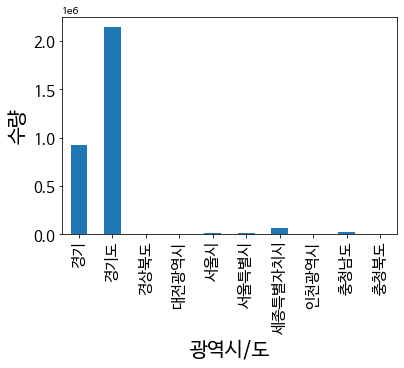

In [ ]:
df_groupby_도1 = df_ecomm_dropped.groupby(['SHPR_ADDR_1'], sort=True)
df_groupby_도1['ITEM_QTY'].sum().plot(kind='bar')
plt.xlabel('광역시/도', fontsize=20)
plt.ylabel('수량', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

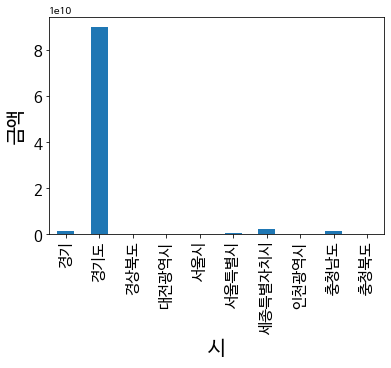

In [ ]:
df_groupby_시 = df_ecomm_dropped.groupby(['SHPR_ADDR_1'], sort=True)
df_groupby_시['ITEM_AMT'].sum().plot(kind='bar')
plt.xlabel('시', fontsize=20)
plt.ylabel('금액', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
df_groupby_시 = df_ecomm_dropped.groupby(['SHPR_ADDR_2'], sort=True)
df_groupby_시['ITEM_QTY'].sum().plot(kind='bar')
plt.xlabel('시', fontsize=20)
plt.ylabel('수량', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

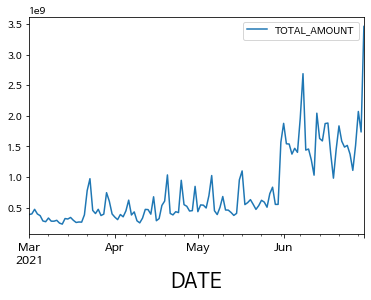

In [ ]:
new_column = {'ITEM_AMT': 'TOTAL_AMOUNT'}

groupby_ecomm_AMT = df_ecomm_dropped.drop(['BKG_TIME'], axis=1).rename(columns=new_column).groupby(['BKG_DATE'], sort=True)['TOTAL_AMOUNT'].sum()
groupby_ecomm_AMT.plot(legend=True)
plt.xlabel('DATE', fontsize=20)
plt.xticks(fontsize=12)

plt.show()


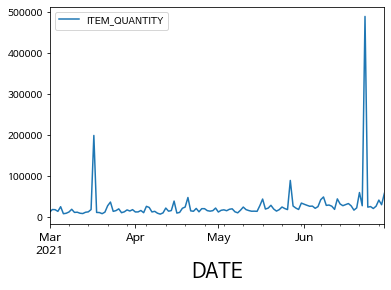

In [ ]:
new_column = {'ITEM_QTY': 'ITEM_QUANTITY'}
groupby_ecomm_QUA = df_ecomm_dropped.drop(['BKG_TIME'], axis=1).rename(columns=new_column).groupby(['BKG_DATE'], sort=True)['ITEM_QUANTITY'].sum()
groupby_ecomm_QUA.plot(legend=True)
plt.xlabel('DATE', fontsize=20)
plt.xticks(fontsize=12)

plt.show()

In [ ]:
df_ecomm_dropped.dtypes

BKG_DATE        datetime64[ns]
BKG_TIME                 int64
ITEM_QTY                 int64
ITEM_AMT               float64
REF_ITEM_SEQ            object
ORDER_YN                object
SHPR_ADDR_1             object
SHPR_ADDR_2             object
CNEE_ADDR_1             object
CNEE_ADDR_2             object
dtype: object

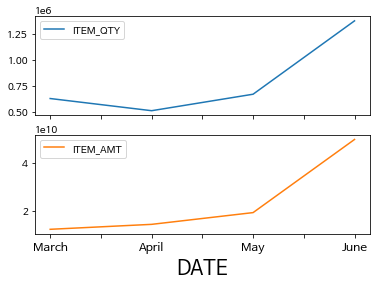

In [ ]:
from matplotlib import ticker

groupby_month = df_ecomm_dropped.drop(['BKG_TIME'], axis=1).groupby(pd.Grouper(key='BKG_DATE', freq='1M')).sum()

# Month 정보를 스트링으로 변환
groupby_month.index = groupby_month.index.strftime('%B')

fig, axs = groupby_month.plot(subplots=True)
axs.tick_params(axis='x', labelsize=14)

plt.xlabel('DATE', fontsize=20)
plt.xticks(fontsize=12)

plt.show()

In [ ]:
# Ecommerce 데이터 경로
target_dir = "/content/drive/MyDrive/수요예측/2. 택배 배송 데이터/"

# 파일 병합(CONCAT)을 위한 사전 작업
all_csvs = glob.glob(os.path.join(target_dir, "*.csv"))
df_from_each = (pd.read_csv(f) for f in all_csvs)

# "1-x. 이커머스 FC주문 데이터_x월" 형식의 csv 파일 병합(CONCAT)
df_package_source = pd.concat(df_from_each, ignore_index=True)

In [ ]:
# "Unnamed: 0"은 인덱스를 나타낼 뿐이다
df_package_source.head()
df_package = df_package_source

In [ ]:
df_package['배달일자'] = pd.to_datetime(df_package['배달일자'], format='%Y-%m-%d')
df_package['집화일자'] = pd.to_datetime(df_package['집화일자'], format='%Y-%m-%d')
df_package['집배일자'] = pd.to_datetime(df_package['집배일자'], format='%Y-%m-%d')

df_package.tail(10)

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
4636489,38,배달,2021-05-31,2021-05-31,신용,1,2500,Y,141221,2021-05-31,스마트폰,스포츠/레저,106,경기 화성시 병점1로 65
4636490,39,배달,2021-05-31,2021-05-31,선불,1,6000,Y,132322,2021-05-31,스마트폰,스포츠/레저,236,경기도 오산시 외삼미로15번길 2-62 상원트윈채 102호 (
4636491,40,배달,2021-05-31,2021-05-31,선불,1,6000,Y,100517,2021-05-31,스마트폰,스포츠/레저,4,경기도 화성시 향남읍 발안서로
4636492,41,배달,2021-05-31,2021-05-20,선불,1,2500,Y,91619,2021-05-20,스마트폰,스포츠/레저,232,경기 화성시 양감면 창말안길
4636493,42,배달,2021-05-31,2021-05-31,신용,1,5000,Y,125225,2021-05-31,스마트폰,스포츠/레저,157,경기 오산시 오산동 923-2번지 운암대동황토방아파트 황토방아파트
4636494,43,배달,2021-05-31,2021-05-28,신용,1,6000,Y,151325,2021-05-28,화면,스포츠/레저,149,경기 화성시 봉담읍 동화리
4636495,44,배달,2021-05-31,2021-05-31,신용,1,3500,Y,140930,2021-05-31,스마트폰,스포츠/레저,177,"경기도 오산시 부산중앙로 11 (부산동, 시티자이 1단지) 시티자이"
4636496,45,배달,2021-05-31,2021-05-31,신용,1,2500,Y,124826,2021-05-31,스마트폰,스포츠/레저,52,경기도 화성시 봉담읍 상리1길 127 (봉담읍) 이편한세상 신봉담아파트
4636497,46,배달,2021-05-31,2021-05-31,신용,1,2500,Y,91844,2021-05-31,스마트폰,스포츠/레저,39,경기도 화성시 향남읍 행정동로 22
4636498,47,배달,2021-05-31,2021-05-18,선불,1,3500,Y,113159,2021-05-18,스마트폰,스포츠/레저,25,경기도 화성시 향남읍 벌말길 16


In [ ]:
df_package.loc[(df_package['구분명'] != '배달')].head()

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소


1. 집화여부 == Y: 4605994
2. 집화여부 == N: 30505
3. 약  150.99 배 정도로 Y가 더 많다


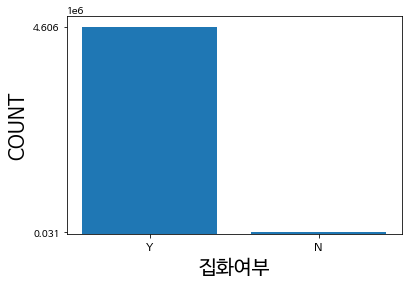

In [ ]:
op1 = df_package.loc[(df_package['집화여부'] == 'Y')]['집화여부'].count()
op2 = df_package.loc[(df_package['집화여부'] != 'Y')]['집화여부'].count()
print(f"1. 집화여부 == Y: {op1}")
print(f"2. 집화여부 == N: {op2}")
print(f"3. 약 {(op1 / op2): .2f} 배 정도로 Y가 더 많다")

x_comp = ["Y", "N"]
y_comp = [op1, op2]

plt.bar(x_comp, y_comp)
plt.xlabel('집화여부', fontsize=20)
plt.ylabel('COUNT', fontsize=20)
plt.xticks(x_comp, fontsize=12)
plt.yticks(y_comp, fontsize=10)
plt.show()

In [ ]:
# df_package.drop(["구분명", "Unnamed: 0", "집화여부"], axis=1, inplace=True)
df_package.describe

<bound method NDFrame.describe of          Unnamed: 0 구분명       집화일자       집배일자 운임명  수량(BOX)    운임 집화여부    집배시간  \
0                 0  배달 2021-03-02 2021-03-03  신용        1  5000    Y  190148   
1                 1  배달 2021-03-02 2021-03-03  선불        1  3500    Y  190149   
2                 2  배달 2021-03-01 2021-03-02  신용        1  2500    Y  143956   
3                 3  배달 2021-03-03 2021-03-04  신용        1  3500    Y  180605   
4                 4  배달 2021-03-03 2021-03-04  신용        1  3500    Y  191503   
...             ...  ..        ...        ...  ..      ...   ...  ...     ...   
4636494          43  배달 2021-05-31 2021-05-28  신용        1  6000    Y  151325   
4636495          44  배달 2021-05-31 2021-05-31  신용        1  3500    Y  140930   
4636496          45  배달 2021-05-31 2021-05-31  신용        1  2500    Y  124826   
4636497          46  배달 2021-05-31 2021-05-31  신용        1  2500    Y   91844   
4636498          47  배달 2021-05-31 2021-05-18  선불        1  3500    Y  1131

In [ ]:
df_package['광역시_도'] = df_package.받는분주소.str.split(' ').str[0][:]

# 경기, 경기도 간의 명칭 통일
# df_package['광역시/도'] = df_package.apply(lambda x: x['광역시/도'].replace("경기도", "경기"), axis=1)
df_package['시/군'] = df_package.받는분주소.str.split(' ').str[1][:]

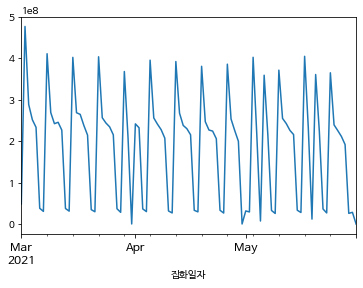

In [ ]:
groupby_집화일자_운임 = df_package.groupby(['집화일자'], sort=True)['운임'].sum().plot(ax=plt.gca())
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
df_package['광역시_도'] = df_package['광역시_도'].replace(["경기"], "gyoungki")
df_package['광역시_도'] = df_package['광역시_도'].replace(["경기도"], "gyoungki")

print(df_package['광역시_도'])

0          gyoungki
1          gyoungki
2          gyoungki
3          gyoungki
4          gyoungki
             ...   
4636494    gyoungki
4636495    gyoungki
4636496    gyoungki
4636497    gyoungki
4636498    gyoungki
Name: 광역시_도, Length: 4636499, dtype: object


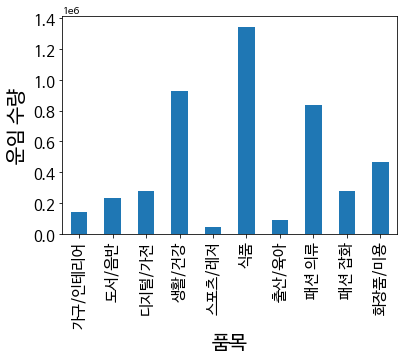

In [ ]:
df_groupby_품목 = df_package.groupby(['품목'], sort=True)
df_groupby_품목['수량(BOX)'].sum().plot(kind='bar')
plt.xlabel('품목', fontsize=20)
plt.ylabel('운임 수량', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

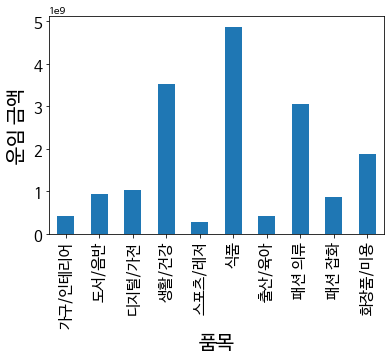

In [ ]:
df_groupby_품목['운임'].sum().plot(kind='bar')
plt.xlabel('품목', fontsize=20)
plt.ylabel('운임 금액', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()